**`Early Stopping in Keras`**

* Early stopping is a regularization technique used in deep learning to prevent overfitting. It monitors a chosen performance metric (typically validation loss) during training and stops the process when the metric stops improving for a specified number of epochs (patience). This helps to avoid the model from memorizing irrelevant patterns in the training data, leading to better generalization on unseen data.

**`How Early Stopping Works in Keras`**

Keras provides a built-in callback called EarlyStopping that you can use to implement this technique. Here's how it works:

**`Initialization: You create an EarlyStopping object, specifying the following parameters:`**

* monitor: The performance metric to track (e.g., 'val_loss' for validation loss).
* patience: The number of epochs to wait for improvement before stopping (default: 0).
* mode: The direction of improvement to consider ('min' for minimizing, 'max' for maximizing, 'auto' for automatic inference).
* min_delta: The minimum change in the monitored metric to consider as improvement (default: 0.001).
* restore_best_weights: Whether to restore the model weights that achieved the best metric value, updated weights (default: False).
* Baseline: We can give our own threshold, so if the monitor value below this threshold it will stop training, if monitor value is above it will not stop, Domain expert will give threshold value.
* start_from_epoch: starting of early stopping from epoch number.

**`Training Loop: During training, at the end of each epoch:`**

The EarlyStopping callback checks if the monitored metric has improved on the validation set compared to the previous best value.
* If the metric has improved by at least min_delta:
The internal counter for epochs without improvement is reset.
The model's weights are considered the new best.
* If the metric hasn't improved for patience consecutive epochs:
Training is stopped, and the model with the best weights is (optionally) restored.

**`Benefits of Early Stopping:`**

* Prevents overfitting
* Reduces training time by stopping when improvement plateaus
* Improves model generalization

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.datasets import make_classification

import tensorflow
import keras
from keras.layers import InputLayer, Dense, Dropout
from keras.optimizers import SGD
from keras.models import Sequential

from keras.callbacks import EarlyStopping

In [3]:
X, y, = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, class_sep=2, random_state=1)

<Axes: >

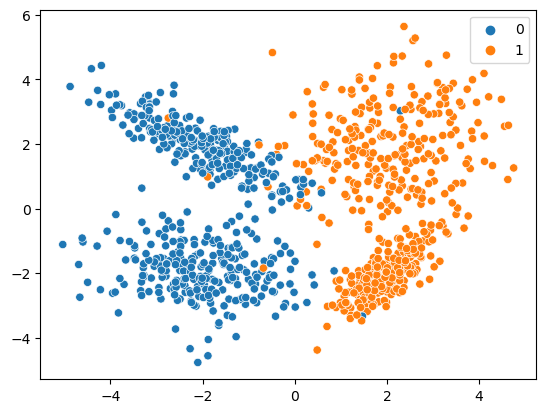

In [4]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [28]:
#First splitting into train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1, stratify=y)

#Second splitting into test validation
X_traincv, X_testcv, y_traincv, y_testcv = train_test_split(X_train, y_train, test_size=0.1, random_state=1, stratify=y_train)


#### MODEL BEFORE EARLY STOPPING

In [8]:
model = Sequential()

model.add(InputLayer(shape=(2,)))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(X_traincv, y_traincv, batch_size=400, epochs=100, validation_data=(X_testcv, y_testcv), verbose=1)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - accuracy: 0.4950 - loss: 0.8929 - val_accuracy: 0.5000 - val_loss: 0.8683
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4997 - loss: 0.8414 - val_accuracy: 0.5000 - val_loss: 0.8068
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5066 - loss: 0.7860 - val_accuracy: 0.5000 - val_loss: 0.7702
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5016 - loss: 0.7558 - val_accuracy: 0.5000 - val_loss: 0.7304
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5100 - loss: 0.7194 - val_accuracy: 0.5000 - val_loss: 0.7048
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5096 - loss: 0.6988 - val_accuracy: 0.5000 - val_loss: 0.6861
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5037 - loss: 0.6821 - val_accuracy: 0.5111 - val_loss: 0.6658
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5109 - loss: 0.6635 - val_accuracy: 0.5111 - val_loss

Epoch 52/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9686 - loss: 0.3054 - val_accuracy: 0.9889 - val_loss: 0.2735
Epoch 53/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9708 - loss: 0.2987 - val_accuracy: 0.9889 - val_loss: 0.2678
Epoch 54/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9764 - loss: 0.2911 - val_accuracy: 0.9889 - val_loss: 0.2623
Epoch 55/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9714 - loss: 0.2898 - val_accuracy: 0.9889 - val_loss: 0.2556
Epoch 56/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9705 - loss: 0.2839 - val_accuracy: 0.9889 - val_loss: 0.2481
Epoch 57/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9733 - loss: 0.2791 - val_accuracy: 0.9889 - val_loss: 0.2423
Epoch 58/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9745 - loss: 0.2702 - val_accuracy: 0.9889 - val_loss: 0.2363
Epoch 59/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9736 - loss: 0.2660 - val_accuracy: 0.9889 - v

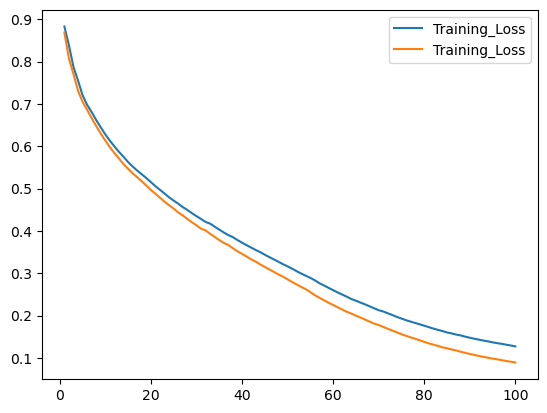

In [12]:
#Range--no of epochs
plt.plot(range(1,101),history.history['loss'],label='Training_Loss')
plt.plot(range(1,101),history.history['val_loss'],label='Training_Loss')

plt.legend()
plt.show()

#### MODEL AFTER EARLY STOPPING

In [29]:
model_1 = Sequential()

model_1.add(InputLayer(shape=(2,)))
model_1.add(Dense(units=64,activation='relu'))
model_1.add(Dense(units=32,activation='relu'))
model_1.add(Dense(units=16,activation='relu'))
model_1.add(Dense(units=8,activation='relu'))
model_1.add(Dense(units=1,activation='sigmoid'))

In [30]:
model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 64)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model_1.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [56]:
#Use patience less than 20 , its a good practice

es = EarlyStopping(monitor='val_loss',
    min_delta=0.01,
    patience=1,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=20)

In [57]:
historyy = model_1.fit(X_traincv, y_traincv, batch_size=400, epochs=100, validation_data=(X_testcv, y_testcv), verbose=1, callbacks=[es])

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9795 - loss: 0.2168 - val_accuracy: 0.9778 - val_loss: 0.1888
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9808 - loss: 0.2145 - val_accuracy: 0.9778 - val_loss: 0.1881
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9786 - loss: 0.2193 - val_accuracy: 0.9778 - val_loss: 0.1875
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9789 - loss: 0.2169 - val_accuracy: 0.9778 - val_loss: 0.1867
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9798 - loss: 0.2180 - val_accuracy: 0.9778 - val_loss: 0.1863
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9792 - loss: 0.2122 - val_accuracy: 0.9778 - val_loss: 0.1864
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9795 - loss: 0.2141 - val_accuracy: 0.9778 - val_loss: 0.1858
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9758 - loss: 0.2197 - val_accuracy: 0.9778 - val_loss:

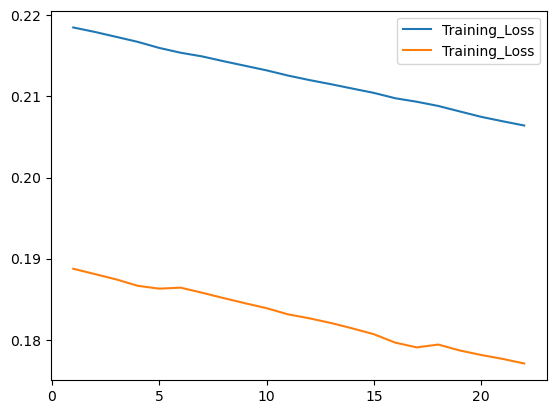

In [58]:
#Range--no of epochs
plt.plot(range(1,23),historyy.history['loss'],label='Training_Loss')
plt.plot(range(1,23),historyy.history['val_loss'],label='Training_Loss')

plt.legend()
plt.show()

**It is a zoomed version of overfitting, Its not that much overfitt, It is better then completely overfitt** 